In [5]:
import pandas as pd
import seaborn as sns 
from sklearn.cluster import KMeans

pokemon_df = pd.read_csv('data/pokemon.csv')

pokemon_df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


<Axes: xlabel='Attack', ylabel='Defense'>

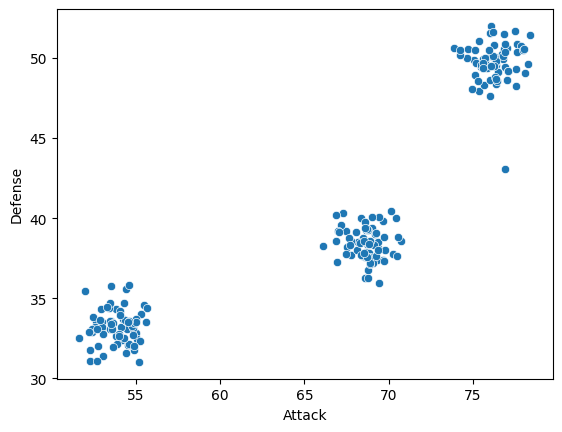

In [4]:
X = pokemon_df[['Attack', 'Defense']]

sns.scatterplot(x = pokemon_df.Attack, y = pokemon_df.Defense)

C:\Users\nitys\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\nitys\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


<Axes: xlabel='Attack', ylabel='Defense'>

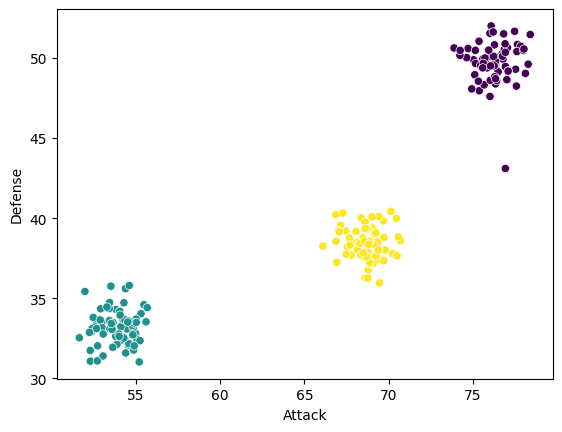

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

kmeans.fit(X)

predictions = kmeans.predict(X)

predictions = kmeans.labels_

pokemon_df['Clusters_k3'] = predictions

sns.scatterplot(x = pokemon_df.Attack, y = pokemon_df.Defense, c = predictions)

<Axes: xlabel='Attack', ylabel='Defense'>

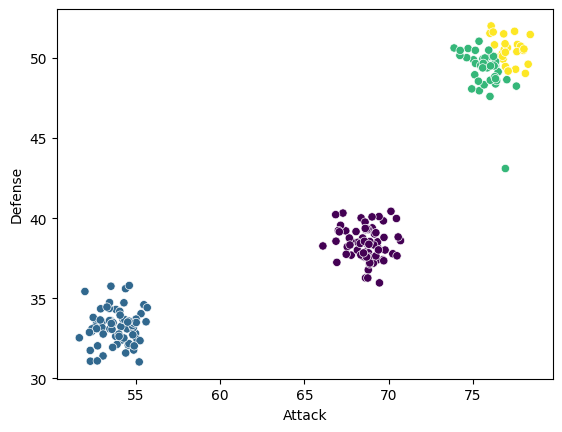

In [7]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

kmeans.fit(X)

predictions = kmeans.predict(X)

predictions = kmeans.labels_

pokemon_df['Clusters_k4'] = predictions

sns.scatterplot(x = pokemon_df.Attack, y = pokemon_df.Defense, c = predictions)

**Task 2-7**

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

instrument_values = pd.read_csv('data/values_from_the_instrument.csv')

instrument_values.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


<Axes: xlabel='cluster', ylabel='silhouette'>

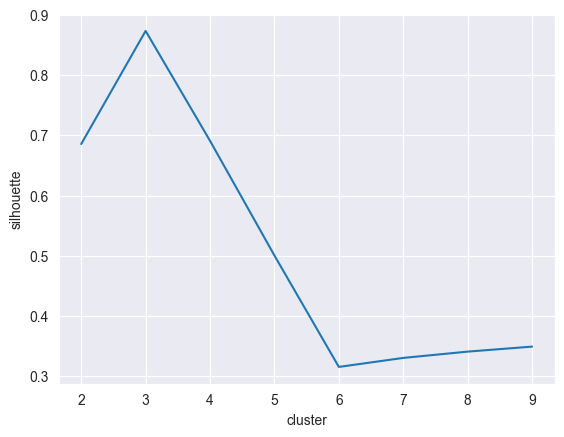

In [11]:
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
    
    silhouette = silhouette_score(X, k_means.predict(X))
    
    return silhouette

silhouette_res = {'silhouette': [], 'cluster': []}

for cluster_num in range(2, 10):
    silhouette_res['silhouette'].append(get_silhouette(cluster_num, instrument_values))
    silhouette_res['cluster'].append(cluster_num)
    
silhouette_df = pd.DataFrame.from_dict(silhouette_res)

sns.set_style('darkgrid')

sns.lineplot(data = silhouette_df, x = 'cluster', y = 'silhouette')

**Задание 3-3**

In [12]:
from sklearn.metrics.cluster import completeness_score

print(round( completeness_score([1, 2, 2, 1, 0],[1, 0, 2, 1, 2]) , 2))

0.74


**Задание 5-4**

In [13]:
import pandas as pd
from sklearn.mixture import GaussianMixture


housing_df = pd.read_csv('data/housing.csv')
housing_df.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


<Axes: xlabel='cluster', ylabel='silhouette'>

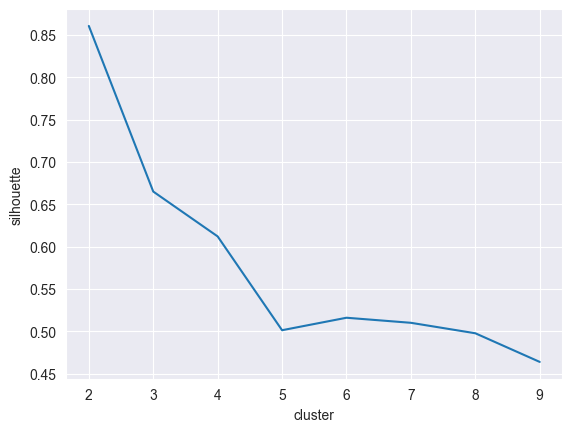

In [16]:
def get_silhouette(components_num, X):
    gm_clustering = GaussianMixture(n_components=components_num, random_state=42)
    gm_clustering.fit(X)
    
    silhouette = silhouette_score(X, gm_clustering.predict(X))
    
    return silhouette

silhouette_res = {'silhouette': [], 'cluster': []}

for components_num in range(2, 10):
    silhouette_res['silhouette'].append(get_silhouette(components_num, housing_df))
    silhouette_res['cluster'].append(components_num)
    
silhouette_df = pd.DataFrame.from_dict(silhouette_res)

sns.set_style('darkgrid')

sns.lineplot(data = silhouette_df, x = 'cluster', y = 'silhouette')

In [34]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)
gm_clustering.fit(housing_df)

h_z = gm_clustering.predict(housing_df)

In [29]:
components_num

9

In [19]:
housing_df_2 = housing_df.copy()

In [35]:
housing_df_2 = pd.concat([housing_df, pd.DataFrame({'claster': h_z})], axis=1)

In [27]:
housing_df_2

,year,price,claster
0,0.081091,23.790515,7
1,9.483270,10.784598,0
2,9.901805,10.003782,5
3,1.930438,21.879849,6
4,1.618601,21.851806,6
...,...,...,...
1350,12.580032,10.122039,8
1351,12.488949,9.934954,8
1352,10.693618,12.083653,3
1353,12.455530,10.304081,8


<Axes: xlabel='year', ylabel='price'>

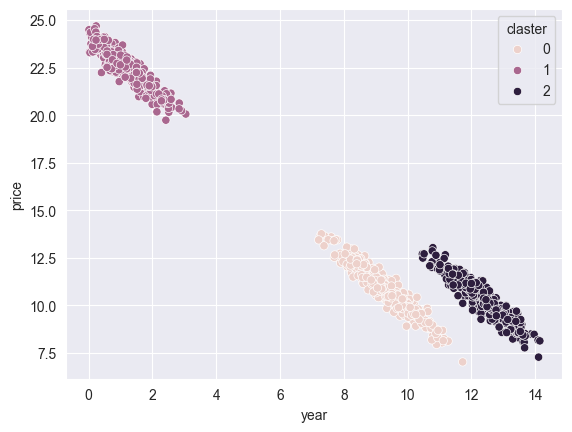

In [36]:
sns.scatterplot(
    housing_df_2, 
    x = 'year',
    y = 'price', 
    hue='claster'
)

<Axes: xlabel='year', ylabel='price'>

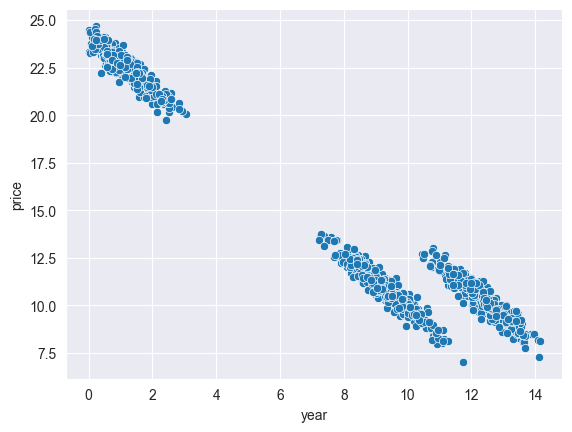

In [33]:
sns.scatterplot(
    housing_df, 
    x = 'year',
    y = 'price', 
    # hue='claster'
)

<Axes: xlabel='year', ylabel='price'>

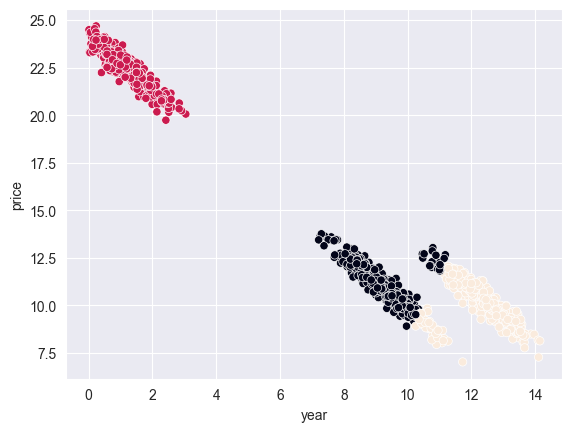

In [37]:
k_means_clustering = KMeans(n_clusters=3, init='k-means++' , n_init=10, random_state=42)

k_means_clustering.fit(housing_df)

predictions_housing = k_means_clustering.predict(housing_df)

sns.scatterplot(x = housing_df.year, y = housing_df.price, c = predictions_housing)

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

kmeans.fit(X)

predictions = kmeans.predict(X)

predictions = kmeans.labels_

pokemon_df['Clusters_k4'] = predictions

sns.scatterplot(x = pokemon_df.Attack, y = pokemon_df.Defense, c = predictions)

In [69]:
housing_df.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


**Задание 3-3**

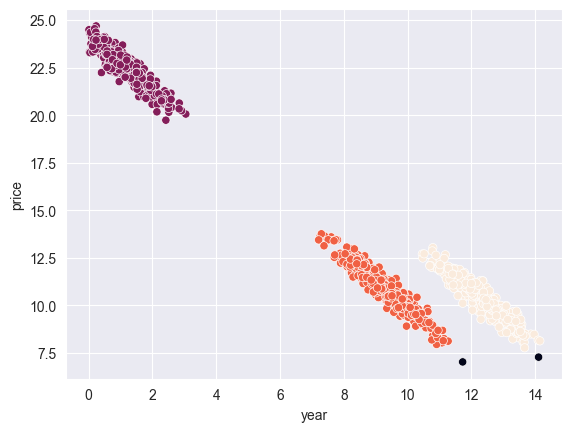

In [141]:
from sklearn.cluster import DBSCAN

clustering_db = DBSCAN(eps=0.5, min_samples=5).fit(housing_df)

sns.scatterplot(x=housing_df.year, y=housing_df.price, c = clustering_db.labels_)
sns.set_style('darkgrid')


### Визуализация

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('data/airbnb.csv')
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


<Axes: xlabel='latitude', ylabel='longitude'>

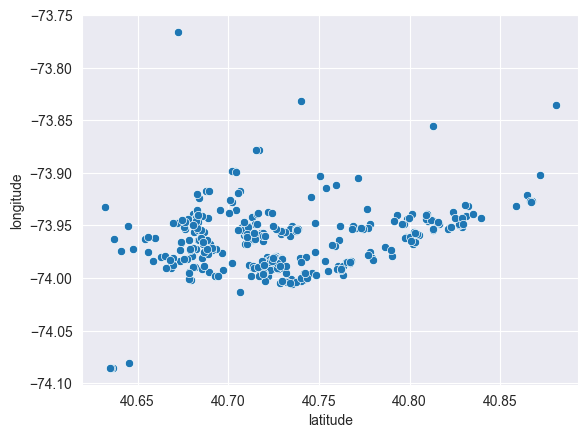

In [92]:
sns.scatterplot(x = df.latitude, y = df.longitude)

In [95]:
k_means_clustering = KMeans(n_clusters=6)

predictions = k_means_clustering.fit_predict(df[['latitude', 'longitude']])

df['clusters'] = predictions

centroids = k_means_clustering.cluster_centers_

centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

for i in range(6):
    centroids_x_dict[i] = centroids_x[i]
    centroids_y_dict[i] = centroids_y[i]
    colors_dict[i] = colors[i]


In [97]:
centroids_x_dict

{0: 40.71476074074074,
 1: 40.80825166666666,
 2: 40.73324723404255,
 3: 40.776615,
 4: 40.637372,
 5: 40.677583085106384}

In [99]:
df['cen_x'] = df.clusters.map(centroids_x_dict)
df['cen_y'] = df.clusters.map(centroids_y_dict)
df['color'] = df.clusters.map(colors_dict)

df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,5,40.677583,-73.969410,#DF8520
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2,40.733247,-73.989404,#2095DF


<Axes: xlabel='latitude', ylabel='longitude'>

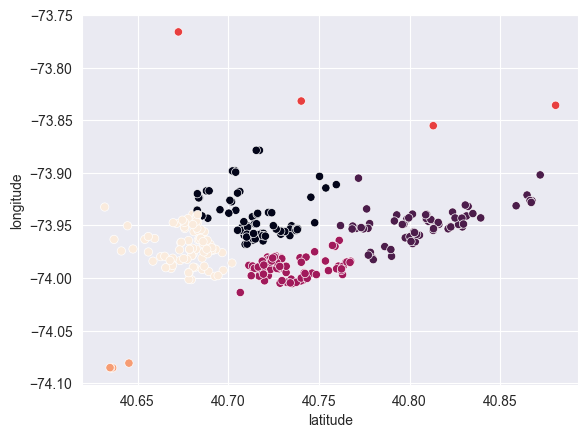

In [101]:
sns.scatterplot(x = df.latitude, y = df.longitude, c = df.clusters)

<Axes: xlabel='latitude', ylabel='longitude'>

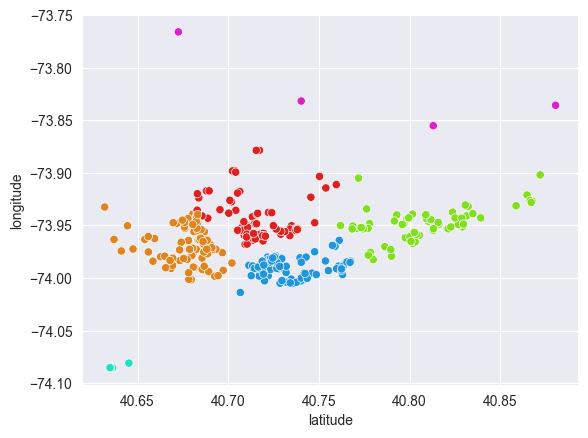

In [103]:
sns.scatterplot(x = df.latitude, y = df.longitude, c = df.color)


<Axes: xlabel='latitude', ylabel='longitude'>

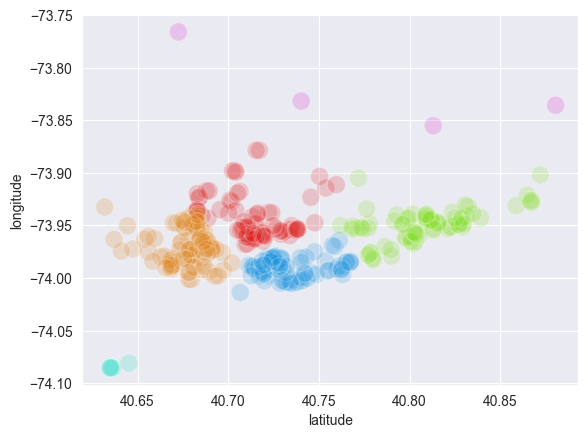

In [104]:
sns.scatterplot(x = df.latitude, y = df.longitude, c = df.color, alpha = 0.2, s = 170)


<Axes: xlabel='latitude', ylabel='longitude'>

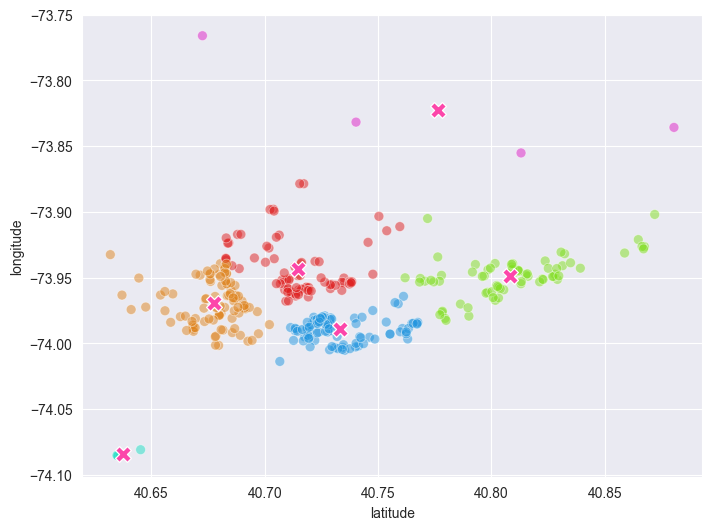

In [110]:
fig, axes = plt.subplots(figsize = (8, 6))

sns.scatterplot(x = df.latitude, y = df.longitude, c = df.color, s = 50, alpha = 0.5)

# sns.scatterplot(x = df.cen_x, y = df.cen_y, marker='X', c = ['#FC46AA'], s = 130)

sns.scatterplot(x = centroids_x, y = centroids_y, marker='X', c = ['#FC46AA'], s = 130)


In [111]:
centroids_x

[40.71476074074074,
 40.80825166666666,
 40.73324723404255,
 40.776615,
 40.637372,
 40.677583085106384]

**Convex Hull**

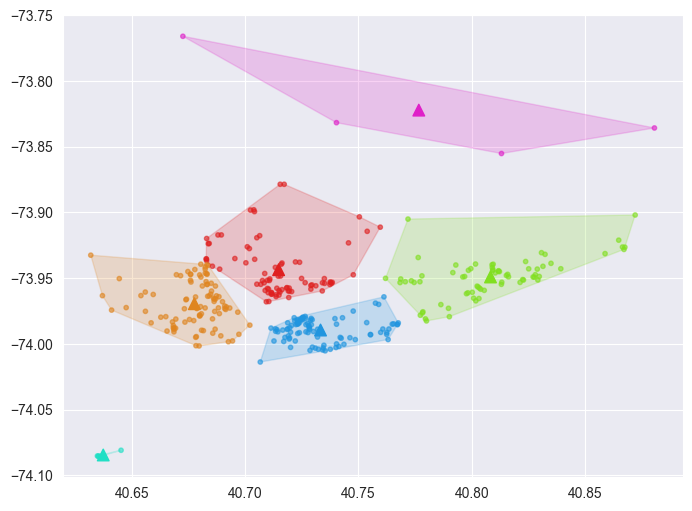

In [115]:
from scipy.spatial import ConvexHull
import numpy as np

fig, ax = plt.subplots(1, figsize = (8, 6))

plt.scatter(x = df.latitude, y = df.longitude, c = df.color, s = 10, alpha = 0.6)
plt.scatter(x = centroids_x, y = centroids_y, marker='^', c=colors, s = 70)


for i in df.clusters.unique():
    
    points = df[df.clusters == i][['latitude', 'longitude']].values
    
    hull = ConvexHull(points)
    
    x_hull = np.append( points[hull.vertices, 0], points[hull.vertices, 0][0] )
    y_hull = np.append( points[hull.vertices, 1], points[hull.vertices, 1][0] )
    
    plt.fill(x_hull, y_hull, c = colors[i], alpha = 0.2)

**Дендрограмма**

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [17.5, 17.5, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [70.0, 70.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [110.0, 110.0, 125.0, 125.0],
  [82.5, 82.5, 117.5, 117.5],
  [135.0, 135.0, 145.0, 145.0],
  [140.0, 140.0, 155.0, 155.0],
  [100.0, 100.0, 147.5, 147.5],
  [165.0, 165.0, 175.0, 175.0],
  [170.0, 170.0, 185.0, 185.0],
  [177.5, 177.5, 195.0, 195.0],
  [123.75, 123.75, 186.25, 186.25],
  [205.0, 205.0, 215.0, 215.0],
  [210.0, 210.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [240.0, 240.0, 255.0, 255.0],
  [217.5, 217.5, 247.5, 247.5],
  [155.0, 155.0, 232.5, 232.5],
  [265.0, 265.0, 275.0, 275.0],
  [270.0, 270.0, 285.0, 285.0],
  [277.5, 277.5, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [310.0, 310.0, 325.0, 325.0],
  [286.25, 286.25, 317.5, 317.5],
  [193.75, 193.75, 301.875, 301.875],
  [335.0, 335.0, 345.0

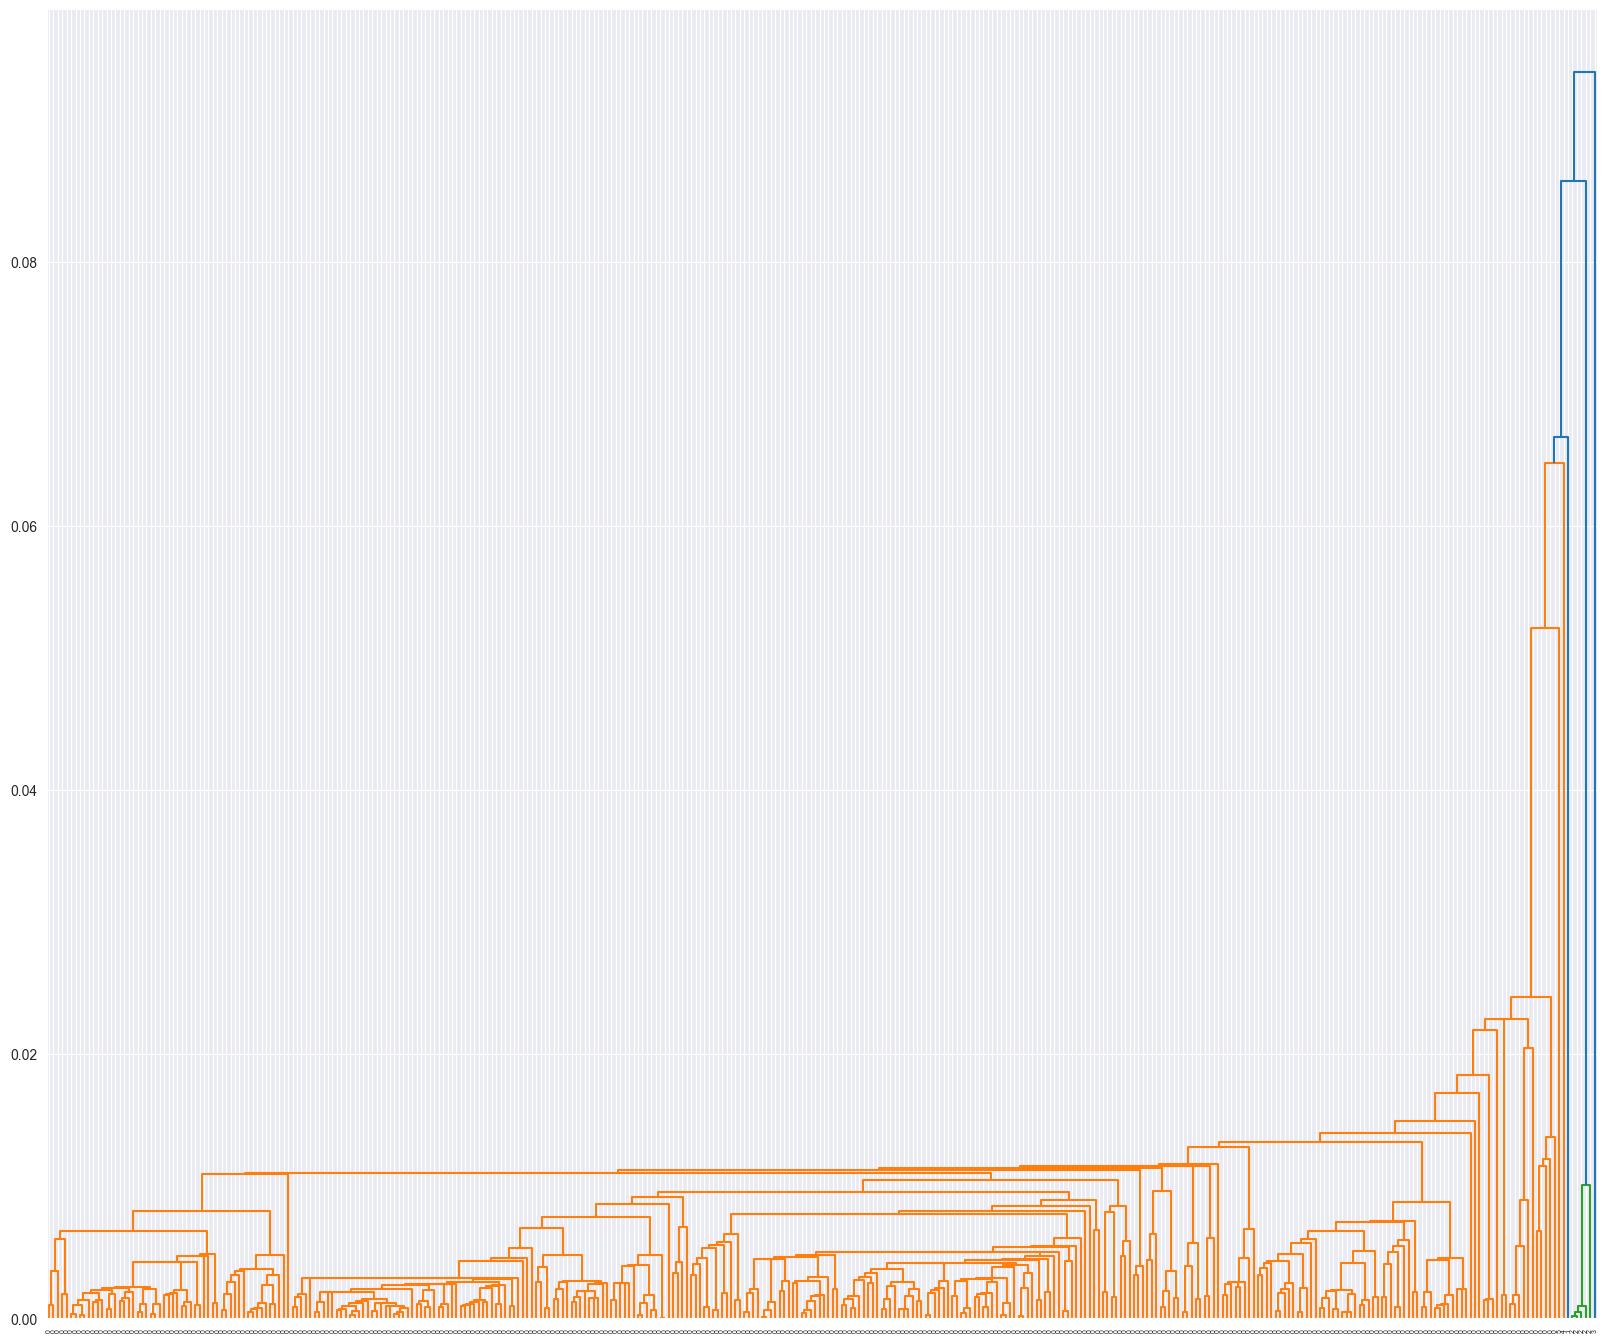

In [116]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

linked = linkage(df[['latitude', 'longitude']], 'single')

plt.figure(figsize=(20,17))

dendrogram(
    Z=linked, 
    orientation='top',
    labels= predictions_ag_model, 
    distance_sort='descending'
)

**Clustergram**

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.020 seconds.
K=3 fitted in 0.003 seconds.
K=4 fitted in 0.012 seconds.
K=5 fitted in 0.006 seconds.
K=6 fitted in 0.008 seconds.
K=7 fitted in 0.007 seconds.
K=8 fitted in 0.006 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

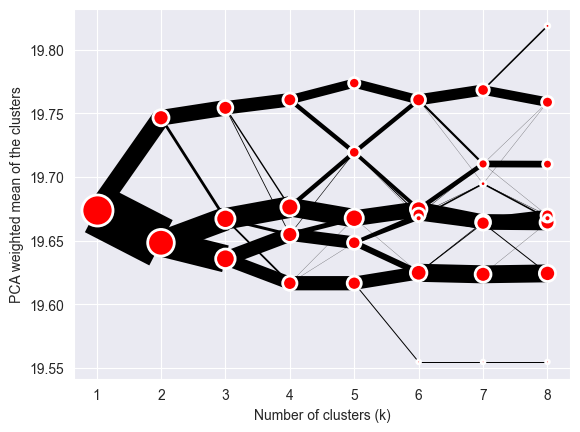

In [118]:
from clustergram import Clustergram

cgram = Clustergram(range(1,9), method = 'kmeans')

cgram.fit(df[['latitude', 'longitude']])

cgram.plot()

**3D-визуализация**

Text(0.5, 0, 'price')

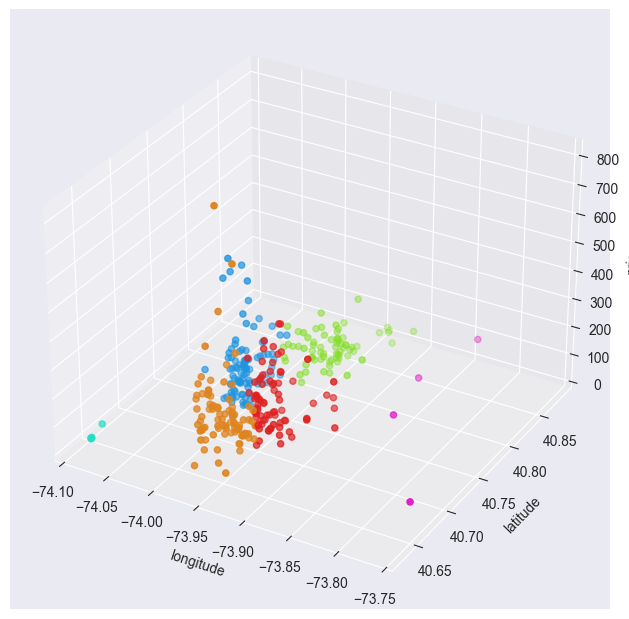

In [133]:
from mpl_toolkits.mplot3d import Axes3D

kmean_clustering = KMeans(n_clusters=6)

kmeans_predictions = kmean_clustering.fit_predict(df[['latitude', 'longitude', 'price']])

df['clusters_3d'] = kmeans_predictions


fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

fig.add_axes(ax)

ax.scatter(xs = df.longitude.to_list(), ys = df.latitude.to_list(), zs = df.price.to_list(), c = df.color)

ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

Text(0.5, 0, 'price')

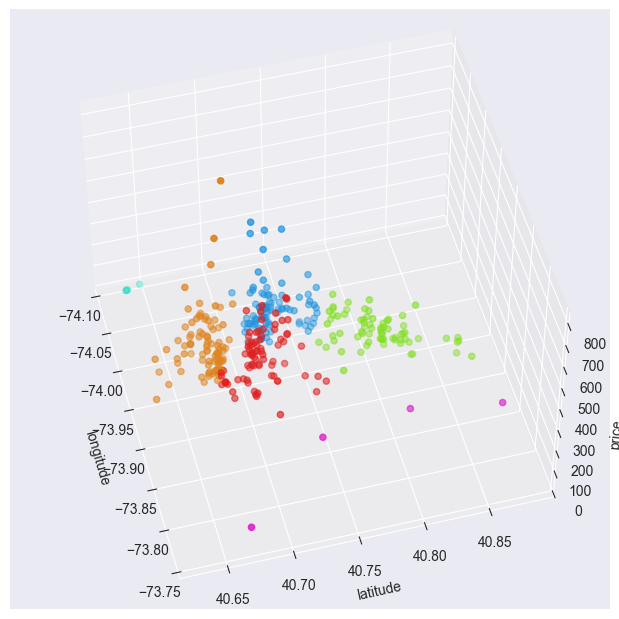

In [132]:
from mpl_toolkits.mplot3d import Axes3D

kmean_clustering = KMeans(n_clusters=6)

kmeans_predictions = kmean_clustering.fit_predict(df[['latitude', 'longitude', 'price']])

df['clusters_3d'] = kmeans_predictions


fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

ax.azim = -15
ax.elev = 50


fig.add_axes(ax)

ax.scatter(xs = df.longitude.to_list(), ys = df.latitude.to_list(), zs = df.price.to_list(), c = df.color)

ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

In [134]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
# в значение color передаём номера кластеров
fig = px.scatter_3d(
    data_frame=df, 
    x = 'longitude', 
    y = 'latitude', 
    z = 'price', 
    color='clusters', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

**Задание 8.4**

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [50.0, 50.0, 65.0, 65.0],
  [20.0, 20.0, 57.5, 57.5],
  [75.0, 75.0, 85.0, 85.0],
  [80.0, 80.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [110.0, 110.0, 125.0, 125.0],
  [87.5, 87.5, 117.5, 117.5],
  [135.0, 135.0, 145.0, 145.0],
  [140.0, 140.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [147.5, 147.5, 170.0, 170.0],
  [102.5, 102.5, 158.75, 158.75],
  [38.75, 38.75, 130.625, 130.625],
  [185.0, 185.0, 195.0, 195.0],
  [190.0, 190.0, 205.0, 205.0],
  [197.5, 197.5, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [230.0, 230.0, 245.0, 245.0],
  [237.5, 237.5, 255.0, 255.0],
  [206.25, 206.25, 246.25, 246.25],
  [226.25, 226.25, 265.0, 265.0],
  [84.6875, 84.6875, 245.625, 245.625],
  [275.0, 275.0, 285.0, 285.0],
  [280.0, 280.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [310.0, 310.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [317.5, 317.

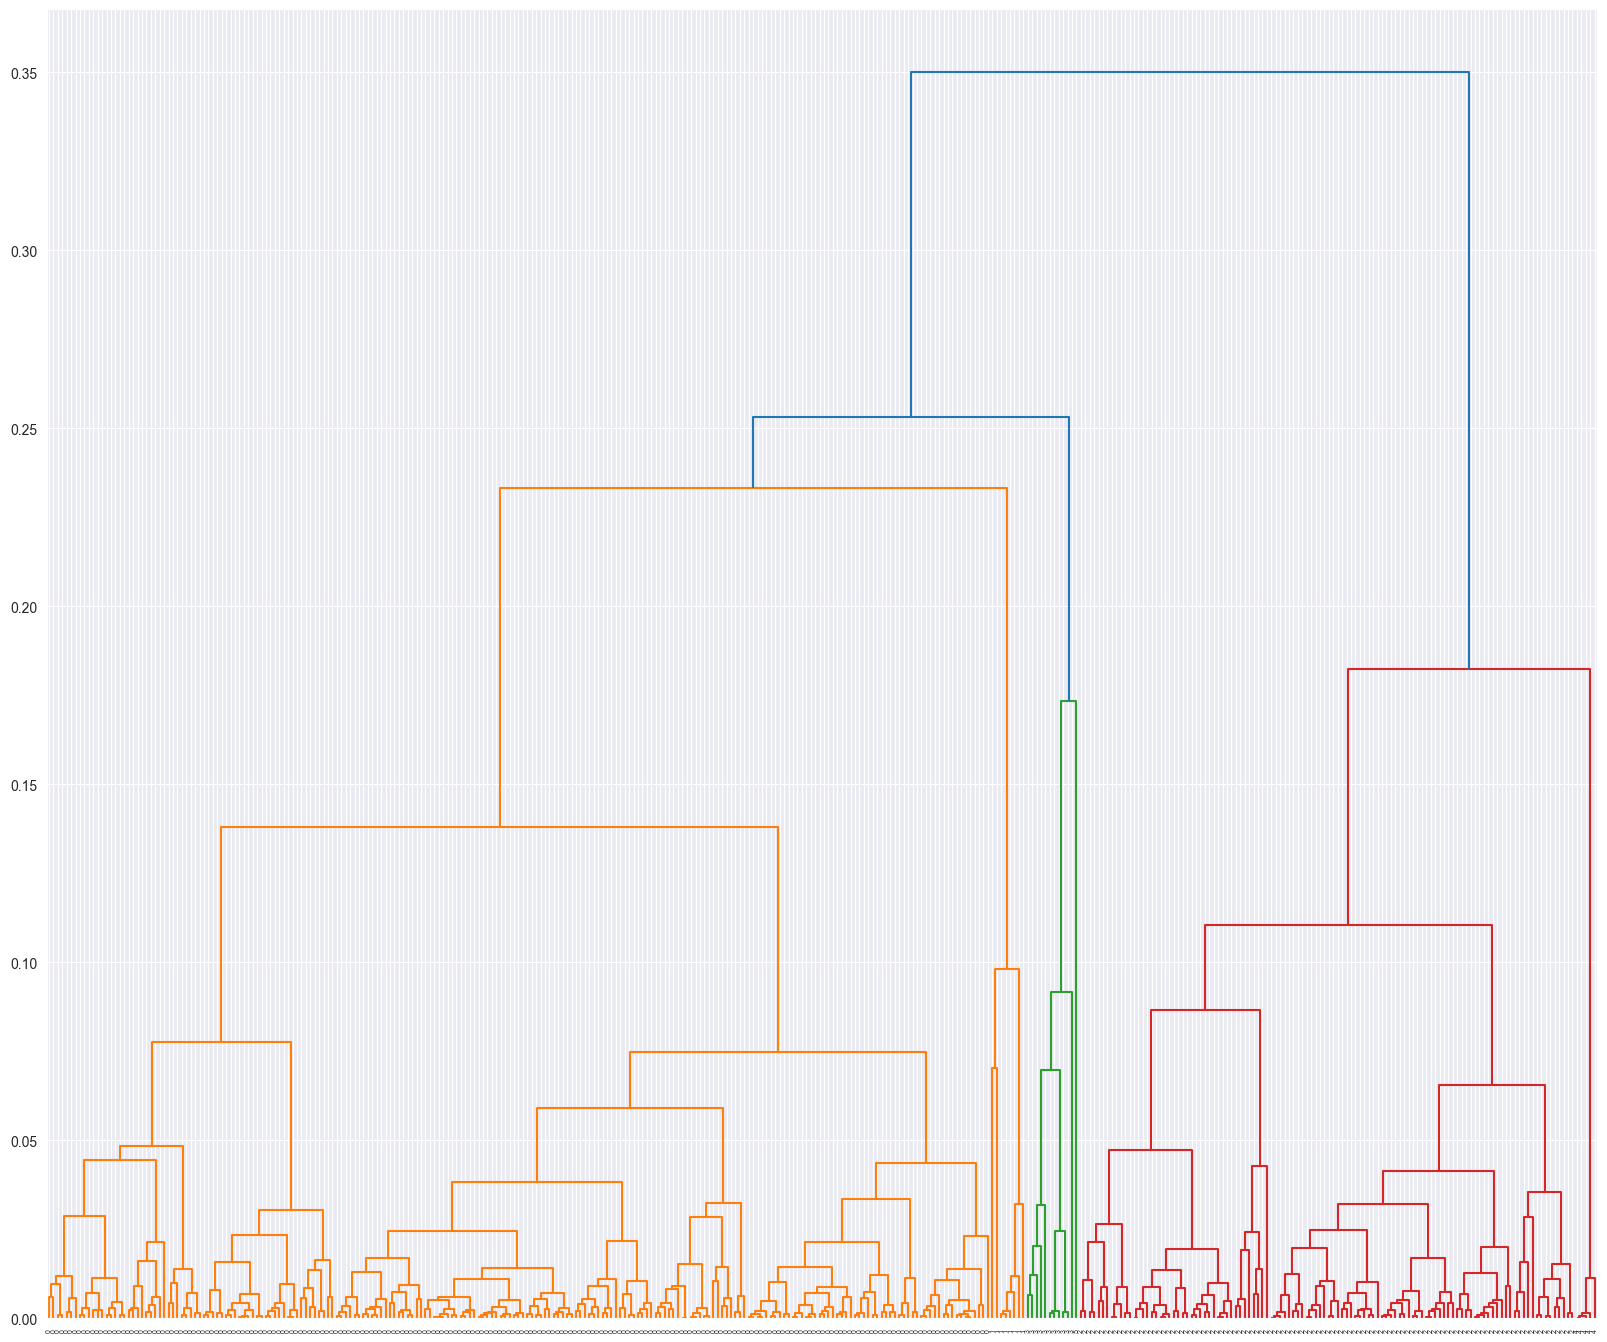

In [139]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='complete')

predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

linked = linkage(df[['latitude', 'longitude']], 'complete')

plt.figure(figsize=(20,17))

dendrogram(
    Z=linked, 
    orientation='top',
    labels= predictions_ag_model, 
    distance_sort='descending'
)

**Задание 8.5**


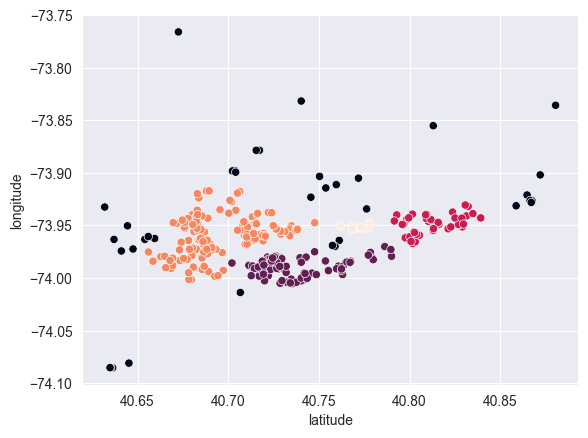

In [145]:
from sklearn.cluster import DBSCAN

clustering_db_airbnb = DBSCAN(eps=0.012, min_samples=6).fit(df[['latitude', 'longitude']])

sns.scatterplot(x=df.latitude, y=df.longitude, c = clustering_db_airbnb.labels_)
sns.set_style('darkgrid')

In [144]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color,clisters_3d,clusters_3d
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,2018-10-19,0.21,6,365,5,40.677583,-73.96941,#DF8520,5,1


### Урок 10 - Практика

In [146]:
import pandas as pd
from sklearn import preprocessing

df = pd.read_csv('data/segmented_customers.csv')
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19.0,15.0,39.0,4.0
1,2,Male,21.0,15.0,81.0,3.0


In [147]:
df[df.isna().any(axis=1)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
200,201,Female,21.0,NaN,40.0,0.0
201,202,Female,30.0,127.0,NaN,NaN
202,203,Male,80.0,NaN,20.0,NaN
203,204,Male,NaN,16.0,120.0,NaN
204,205,Female,NaN,9.0,80.0,NaN


In [148]:
df = df.dropna()

In [149]:
df.rename(columns = {'CustomerID' : 'customer_id', 'Gender' : 'gender', 
                    'Age': 'age', 'Annual Income (k$)': 'annual_income', 
                    'Spending Score (1-100)': 'spending_score', }, inplace = True)

In [150]:
# Проверка на дубликаты 

df[df.duplicated(subset='customer_id')]

,customer_id,gender,age,annual_income,spending_score,cluster


In [154]:
import plotly
import plotly.express as px

fig = px.scatter_3d(
    data_frame=df, 
    x = 'age',
    y = 'annual_income', 
    z = 'spending_score', 
    width=700, 
    height=400
)

fig.show()

In [155]:
X = df[['age', 'annual_income', 'spending_score']]

In [170]:
df

,customer_id,gender,age,annual_income,spending_score,cluster,df_no_eps,df_eps_11,aggl_res_6
0,1,Male,19.0,15.0,39.0,4.0,-1,-1,4
1,2,Male,21.0,15.0,81.0,3.0,-1,0,3
2,3,Female,20.0,16.0,6.0,4.0,-1,-1,4
3,4,Female,23.0,16.0,77.0,3.0,-1,0,3
4,5,Female,31.0,17.0,40.0,4.0,-1,-1,4
...,...,...,...,...,...,...,...,...,...
195,196,Female,35.0,120.0,79.0,1.0,-1,-1,2
196,197,Female,45.0,126.0,28.0,2.0,-1,-1,0
197,198,Male,32.0,126.0,74.0,1.0,-1,-1,2
198,199,Male,32.0,137.0,18.0,2.0,-1,-1,0


In [159]:
clustering_db_df = DBSCAN().fit(X)

clustering_db_no_eps_pred = clustering_db_df.fit_predict(X)

df['df_no_eps'] = clustering_db_no_eps_pred

def get_3d_visualization(df, clust_res):
    fig = px.scatter_3d(
        data_frame=df, 
        x = 'age', 
        y = 'annual_income', 
        z = 'spending_score', 
        color = clust_res,
        width=1000,
        height=700
    )

    #возвращаем график
    return fig

get_3d_visualization(df, 'df_no_eps')

In [160]:
clustering_db_df_eps = DBSCAN(eps = 11).fit(X)

clustering_db_with_eps_pred = clustering_db_df_eps.fit_predict(X)

df['df_eps_11'] = clustering_db_with_eps_pred

def get_3d_visualization(df, clust_res):
    fig = px.scatter_3d(
        data_frame=df, 
        x = 'age', 
        y = 'annual_income', 
        z = 'spending_score', 
        color = clust_res,
        width=1000,
        height=700
    )

    #возвращаем график
    return fig

get_3d_visualization(df, 'df_eps_11')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [17.5, 17.5, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [28.75, 28.75, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [80.0, 80.0, 95.0, 95.0],
  [44.375, 44.375, 87.5, 87.5],
  [105.0, 105.0, 115.0, 115.0],
  [110.0, 110.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [117.5, 117.5, 140.0, 140.0],
  [65.9375, 65.9375, 128.75, 128.75],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [97.34375, 97.34375, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [200.0, 200.0, 215.0, 215.0],
  [207.5, 207.5, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [216.25, 216.25, 240.0, 240.0],
  [133.671875, 133.671875, 228.125, 228.125],
  [255.0, 255.0, 265.0, 265.0],
  [260.0, 260.0, 275.0, 275.0],
  [267.5, 267.5, 285.0, 285.0],
  [276.25, 276.25, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [285.625, 285.625, 310.0, 310.0],
  [325.0, 325.0, 335.0, 335.

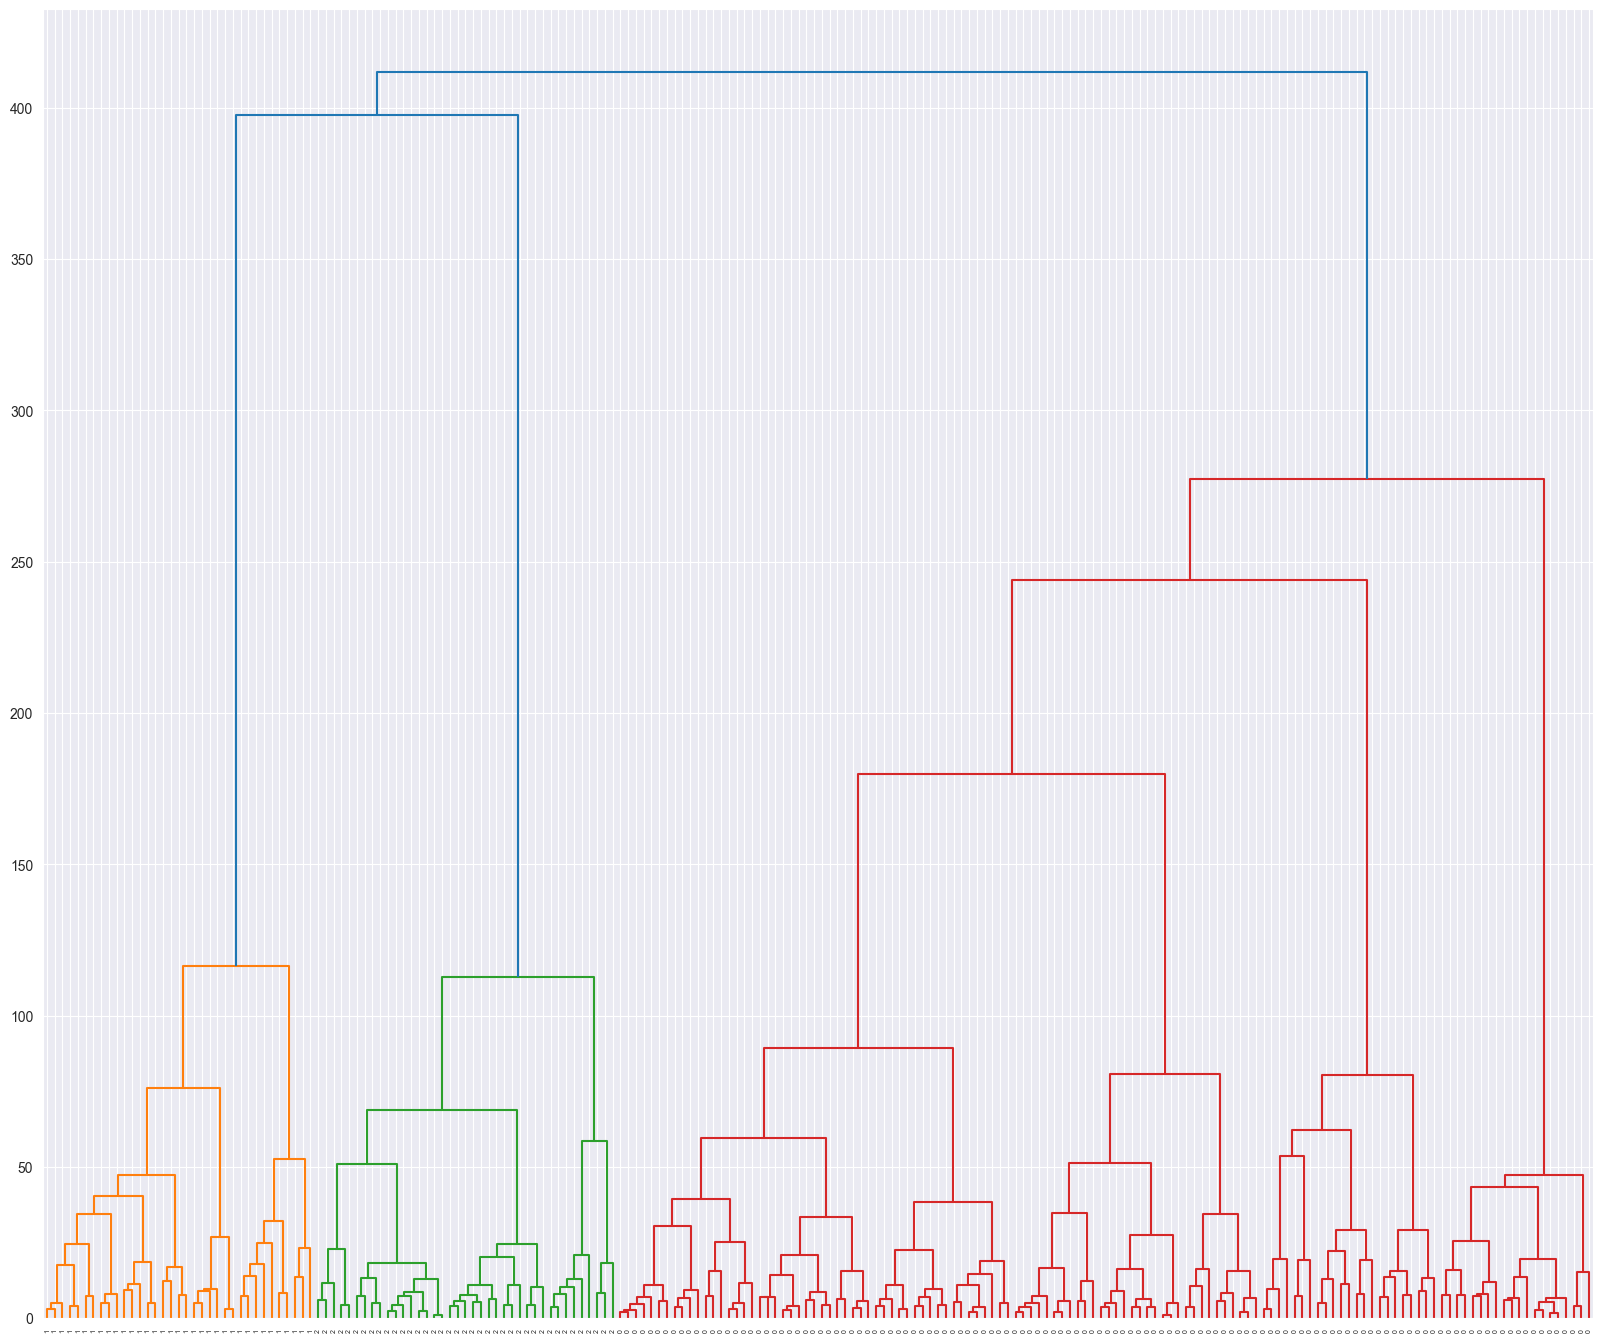

In [ ]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# напишем функцию, которая будет проводить алгомеративную кластеризацию
# на вход она будет принимать X — матрицу с признаками для кластеризации и n_clusters — количество кластеров,
# на выходе будет возвращать список с номерами кластеров
def get_aggl_clustering(X, n_clusters):
    # запустим агломеративную кластеризацию
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    # обучим модель агломеративной кластеризации
    agglomerative_clustering.fit(X)
    # получим список c информацией, к какому кластеру относятся объекты
    aggl_prediction = agglomerative_clustering.labels_
    # вернём список с результатами
    return aggl_prediction

linked = linkage(X, 'ward')

plt.figure(figsize=(20,17))

dendrogram(
    Z=linked, 
    orientation='top',
    labels= get_aggl_clustering(X, 3), 
    distance_sort='descending'
)

In [165]:
def get_aggl_clustering(X, n_clusters):
    # запустим агломеративную кластеризацию
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    # обучим модель агломеративной кластеризации
    agglomerative_clustering.fit(X)
    # получим список c информацией, к какому кластеру относятся объекты
    aggl_prediction = agglomerative_clustering.labels_
    # вернём список с результатами
    return aggl_prediction

df['aggl_res_6'] = get_aggl_clustering(df[['age', 'annual_income', 'spending_score']], 6)
get_3d_visualization(df, 'aggl_res_6')

<Axes: xlabel='cluster', ylabel='silhouette'>

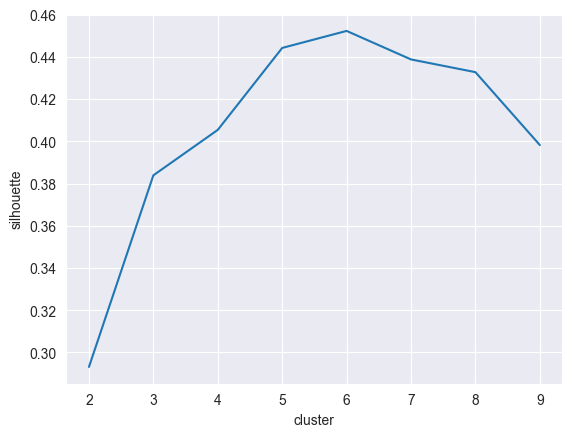

In [167]:
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
    
    silhouette = silhouette_score(X, k_means.predict(X))
    
    return silhouette

silhouette_res = {'silhouette': [], 'cluster': []}

for cluster_num in range(2, 10):
    silhouette_res['silhouette'].append(get_silhouette(cluster_num, X))
    silhouette_res['cluster'].append(cluster_num)
    
silhouette_df = pd.DataFrame.from_dict(silhouette_res)

sns.set_style('darkgrid')

sns.lineplot(data = silhouette_df, x = 'cluster', y = 'silhouette')

In [171]:
from sklearn.metrics.cluster import completeness_score

print(completeness_score(labels_true=df.cluster, labels_pred=df.aggl_res_6))

0.9012847747610448
